In [4]:
!pip install -q kaggle



In [6]:
!unzip -q "/content/drive/MyDrive/archive (1).zip" -d "/content/"


### Step 1: Load raw images and check their original sizes

In this step, I unzip my dataset and scan through a sample of the images to check their shapes.  
Since real-world image datasets are usually unclean, the images often come in many different sizes.  
To verify this, I load around 300 images and record each image's resolution.

This helps me understand the dataset before preprocessing and also proves that the images do not all have the same shape.  
Later, I will resize them to a fixed size so they can be used for machine learning models.

The output shows:
- how many images were scanned  
- how many unique shapes were found  
- some example shapes (height, width, channels)  


In [8]:
import os
from PIL import Image
import numpy as np

DATA_DIR = "/content/raw-img"
shapes = []

for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(root, f)
            try:
                img = Image.open(path).convert("RGB")
                shapes.append(np.array(img).shape)
            except:
                pass

    if len(shapes) > 300:
        break

print("Images scanned:", len(shapes))
print("Unique shapes found:", len(set(shapes)))
print("Example shapes:", list(set(shapes))[:10])


Images scanned: 1820
Unique shapes found: 336
Example shapes: [(300, 254, 3), (300, 243, 3), (215, 300, 3), (480, 640, 3), (187, 300, 3), (195, 270, 3), (284, 300, 3), (429, 640, 3), (300, 216, 3), (120, 160, 3)]


### Step 2: Resize all images to a fixed size

After confirming that the images have different shapes, the next step is to resize them.  
Machine learning models require all images to have the same dimensions, so resizing is an important preprocessing step.

Here’s what this code does:
- It walks through every image in the raw dataset.
- It recreates the same folder structure in a new directory.
- Each image is converted to RGB and resized to **224 × 224** pixels.
- The resized images are saved into a separate folder.

This gives me a clean and uniform dataset that can be used for model training or feature extraction.


In [10]:
import os
from PIL import Image

DATA_DIR = "/content/raw-img"
RESIZED_DIR = "animals10_resized"
TARGET_SIZE = (224, 224)

os.makedirs(RESIZED_DIR, exist_ok=True)

for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith((".jpg", ".jpeg", ".png")):
            src = os.path.join(root, f)

            # recreate folder structure inside RESIZED_DIR
            rel = os.path.relpath(root, DATA_DIR)
            out_folder = os.path.join(RESIZED_DIR, rel)
            os.makedirs(out_folder, exist_ok=True)

            dst = os.path.join(out_folder, f)

            try:
                img = Image.open(src).convert("RGB")
                img = img.resize(TARGET_SIZE)
                img.save(dst)
            except:
                pass

print("Resizing completed!")



Resizing completed!


### Step 3: Extract simple features from the resized images

Next, I extract a few basic features from the resized images.  
These features help describe the image numerically and can be used for simple machine learning tasks or dataset analysis.

For each image, I compute:
- **Mean Color (R, G, B):** average color intensity of each channel  
- **Standard Deviation:** how much the pixel values vary  
- **Edge Strength:** measured using the Canny edge detector on the grayscale image  

These features give a quick idea of the image’s color distribution and structural patterns.  
To avoid flooding the output, I only print features for the first 10 images.


In [12]:
import os
import numpy as np
from PIL import Image
import cv2

RESIZED_DIR = "animals10_resized"

image_count = 0
MAX_IMAGES_TO_PROCESS = 10 # Limit output to avoid overwhelming the console

for root, dirs, files in os.walk(RESIZED_DIR):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(root, f)

            try:
                img = Image.open(path).convert("RGB")
                arr = np.array(img)
            except Exception as e:
                print(f"Error opening image {path}: {e}")
                continue

            # basic features
            mean_color = arr.mean(axis=(0,1))
            std_color  = arr.std(axis=(0,1))

            gray = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
            edges = cv2.Canny(gray, 100, 200)
            edge_strength = edges.mean()

            print("\nImage:", path)
            print(" Mean Color:", mean_color)
            print(" Std Color:", std_color)
            print(" Edge Strength:", edge_strength)

            image_count += 1
            if image_count >= MAX_IMAGES_TO_PROCESS:
                print(f"\nProcessed {MAX_IMAGES_TO_PROCESS} images. Stopping to avoid huge output.")
                break
    if image_count >= MAX_IMAGES_TO_PROCESS:
        break


Image: animals10_resized/pecora/OIP-9BUbj3feYkwsqIg5DyZUsQHaE8.jpeg
 Mean Color: [163.42610013 155.51678093 143.89947385]
 Std Color: [68.34926576 69.29730088 71.80430487]
 Edge Strength: 45.94228316326531

Image: animals10_resized/pecora/eb34b80c2bf1063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
 Mean Color: [171.30235571 160.04009885 117.52580915]
 Std Color: [65.87357169 65.06428326 74.61574484]
 Edge Strength: 22.27997448979592

Image: animals10_resized/pecora/eb3db40d29f1013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
 Mean Color: [ 96.91543766 103.73266103  62.20362325]
 Std Color: [46.09008702 44.19991462 45.90769298]
 Edge Strength: 60.14678332270408

Image: animals10_resized/pecora/eb37b00e28f5063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
 Mean Color: [80.97584503 87.74493782 44.58856824]
 Std Color: [45.28388363 36.4365564  37.96865431]
 Edge Strength: 27.072405133928573

Image: animals10_resized/pecora/OIP-M_B8CCV0sMbfNl069PpJawHaHX

### Step 4: Display sample images from the dataset

To visually confirm that the resizing step worked correctly, I display a small sample of images.  
This gives me a quick look at the dataset and ensures that:
- the images were resized properly  
- they were saved in the correct folder  
- they can be opened without errors  

The code selects 6 images and shows them in a 2×3 grid using Matplotlib.


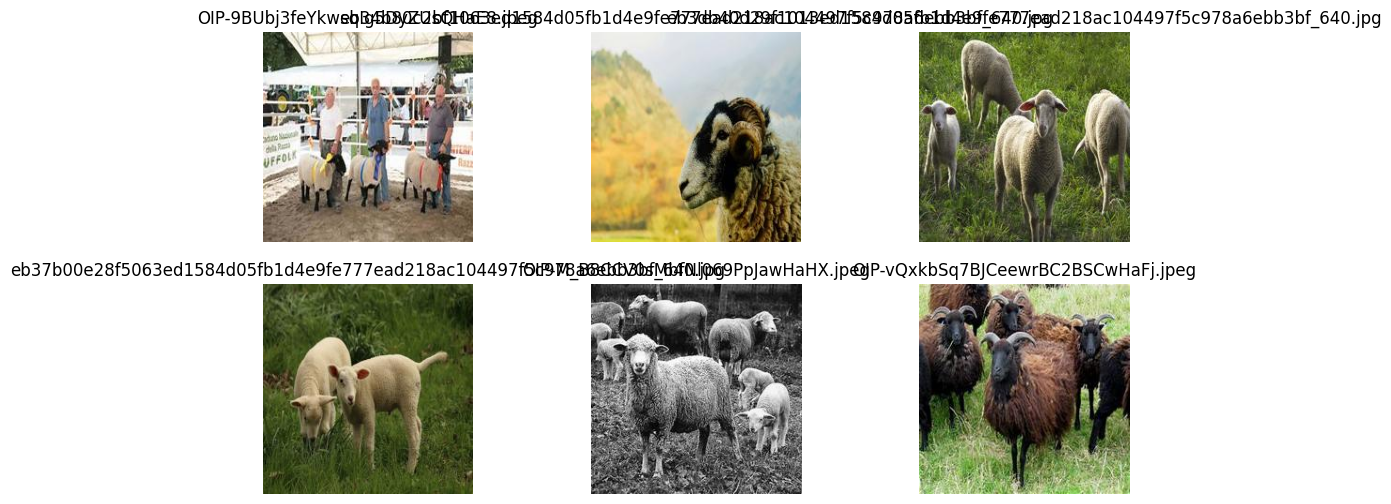

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

DATA_DIR = "animals10_resized"

sample_paths = []

for root, dirs, files in os.walk(DATA_DIR):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            sample_paths.append(os.path.join(root, f))
            if len(sample_paths) == 6:
                break
    if len(sample_paths) == 6:
        break

plt.figure(figsize=(12, 6))
for i, path in enumerate(sample_paths):
    img = Image.open(path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")

plt.show()